# Classification And Regression Trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

from sklearn.metrics import accuracy_score, recall_score, precision_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Yasmeenmad/data_science_bootcamp/main/Week12/CART_Models/dog_horse.csv')
df.head()

,Unnamed: 0,height,weight,target,type
0,0,27.0,71.0,0.0,dog
1,1,27.0,92.0,0.0,dog
2,2,32.0,47.0,0.0,dog
3,3,30.0,90.0,0.0,dog
4,4,28.0,91.0,0.0,dog


In [3]:
#split dataset in features and target variable
feature_cols = ['height', 'weight']
X = df[feature_cols] # Features
y = df.target# Target variable

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Model Using Entropy

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

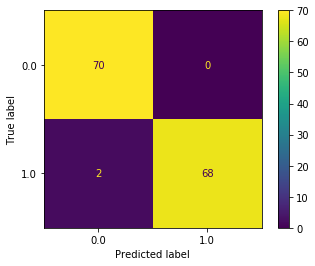

In [6]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clf, X_train, y_train);

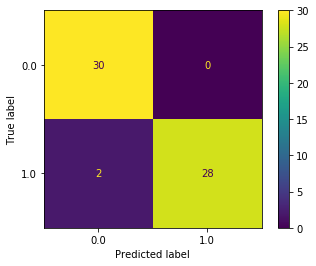

In [7]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clf, X_test, y_test);

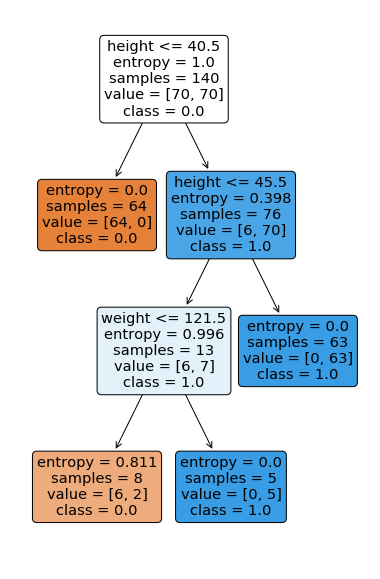

In [8]:
# Plot the tree
plt.figure(figsize=(6,10))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=feature_cols, # columns in same order as was trained on
               class_names=[str(x) for x in clf.classes_]); # use cl2.classes_ to find class order

## Model Using Gini

In [9]:
# Set max depth to 3 to make plotting the tree more visible
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=3).fit(X_train, y_train)

In [10]:
#we can calculate the accuarcy using score
score = clf2.score(X_train, y_train)
print(score)

0.9857142857142858


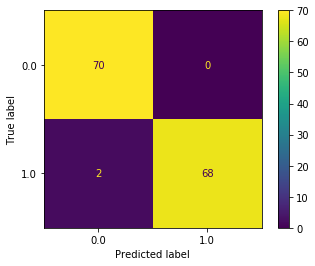

In [11]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clf2, X_train, y_train);

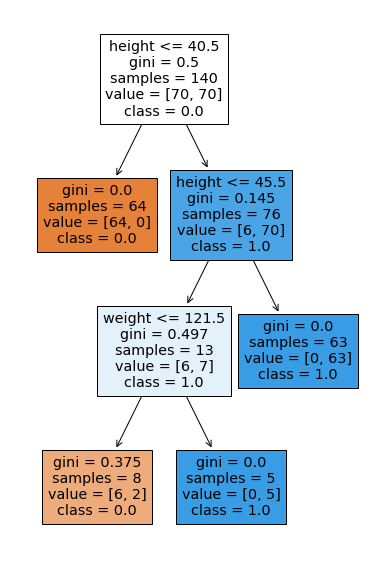

In [12]:
# Plot the tree
plt.figure(figsize=(6,10))
tree.plot_tree(clf2, filled=True, rounded=False, feature_names=feature_cols, # columns in same order as was trained on
    class_names=[str(x) for x in clf2.classes_]); # use cl2.classes_ to find class order

## Fully Grown Tree Using Gini

In [13]:
# Fully grown tree using Gini index as model criterion

clf3 = DecisionTreeClassifier(criterion='gini')

clf3.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
#we can calculate the accuarcy using score
score = clf3.score(X_train, y_train)
print(score)

1.0


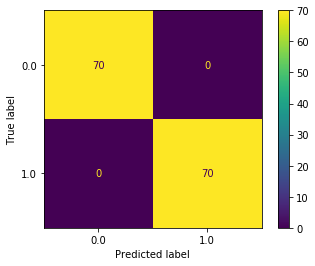

In [15]:
#we can also make a simple confusion matrix
plot_confusion_matrix(clf3, X_train, y_train);

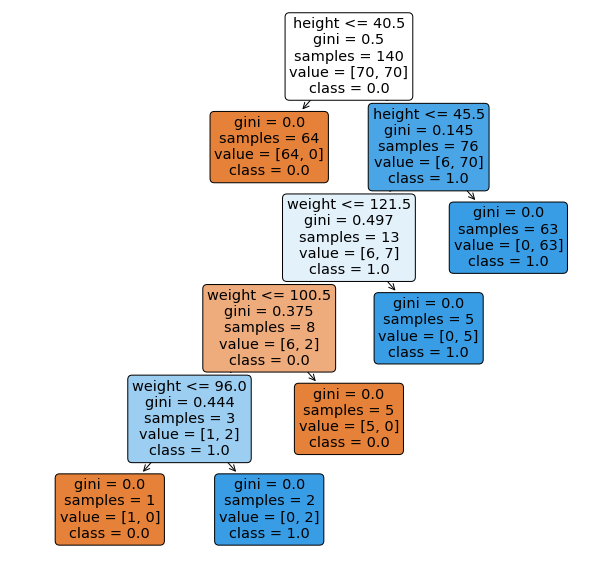

In [16]:
# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf3, filled=True, rounded=True, feature_names=feature_cols, # columns in same order as was trained on
    class_names=[str(x) for x in clf3.classes_]); # use cl2.classes_ to find class order

## Report the precision, recall, and accuracy of training and test sets

In [17]:
# create a function that calculate the the Precision, Recall and Accuracy
def classification_model_evaluation(y_test, y_pred):
    
    # calculate the scores from sklearn.metrics package
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    
    # return the scores
    return "Accuracy Score = {val1}, Precision Score = {val2} , Recall Score = {val3} ".format(val1 = accuracy, val2 = precision, val3 = recall)

In [18]:
# Predict the response for test and train dataset of clf
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Predict the response for test and train dataset of clf2
y_pred_test2 = clf2.predict(X_test)
y_pred_train2 = clf2.predict(X_train)

# Predict the response for test and train dataset of clf3
y_pred_test3 = clf3.predict(X_test)
y_pred_train3 = clf3.predict(X_train)

###  Model Using Entropy Scores

In [19]:
# for the test dataset
classification_model_evaluation(y_test, y_pred_test)

'Accuracy Score = 0.9666666666666667, Precision Score = 1.0 , Recall Score = 0.9333333333333333 '

In [20]:
# for the train dataset
classification_model_evaluation(y_train, y_pred_train)

'Accuracy Score = 0.9857142857142858, Precision Score = 1.0 , Recall Score = 0.9714285714285714 '

### Model Using Gini Scores

In [21]:
# for the test dataset
classification_model_evaluation(y_test, y_pred_test2)

'Accuracy Score = 0.9666666666666667, Precision Score = 1.0 , Recall Score = 0.9333333333333333 '

In [22]:
# for the train dataset
classification_model_evaluation(y_train, y_pred_train2)

'Accuracy Score = 0.9857142857142858, Precision Score = 1.0 , Recall Score = 0.9714285714285714 '

### Fully Grown Tree Using Gini Scores

In [23]:
# for the test dataset
classification_model_evaluation(y_test, y_pred_test3)

'Accuracy Score = 0.9666666666666667, Precision Score = 1.0 , Recall Score = 0.9333333333333333 '

In [24]:
# for the train dataset
classification_model_evaluation(y_train, y_pred_train3)

'Accuracy Score = 1.0, Precision Score = 1.0 , Recall Score = 1.0 '